# Data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model_data = {
        "XGLM-564M": {
            "Overall Accuracy": 81.07,
            "Error Type Accuracy": {
                "M": 54.05,
                "W": 81.25,
                "S": 83.25,
                "R": 96.11
            }
        },
        "BLOOM-560m": {
            "Overall Accuracy": 82.37,
            "Error Type Accuracy": {
                "M": 55.86,
                "W": 80.90,
                "S": 84.37,
                "R": 95.22
            }
        },
        "Qwen3-0.6B": {
            "Overall Accuracy": 79.07,
            "Error Type Accuracy": {
                "M": 51.89,
                "W": 72.03,
                "S": 81.87,
                "R": 93.41
            }
        }
    }

# Plotting

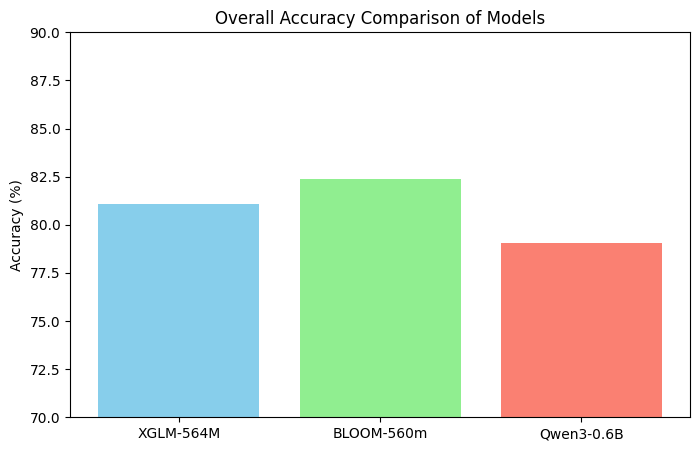

In [ ]:
# Overall accuracy
models = list(model_data.keys())
overall_accuracies = [model_data[model]["Overall Accuracy"] for model in models]

plt.figure(figsize=(8, 5))
plt.bar(models, overall_accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel("Accuracy (%)")
plt.title("Overall Accuracy Comparison of Models")
plt.ylim(70, 90)
plt.show()

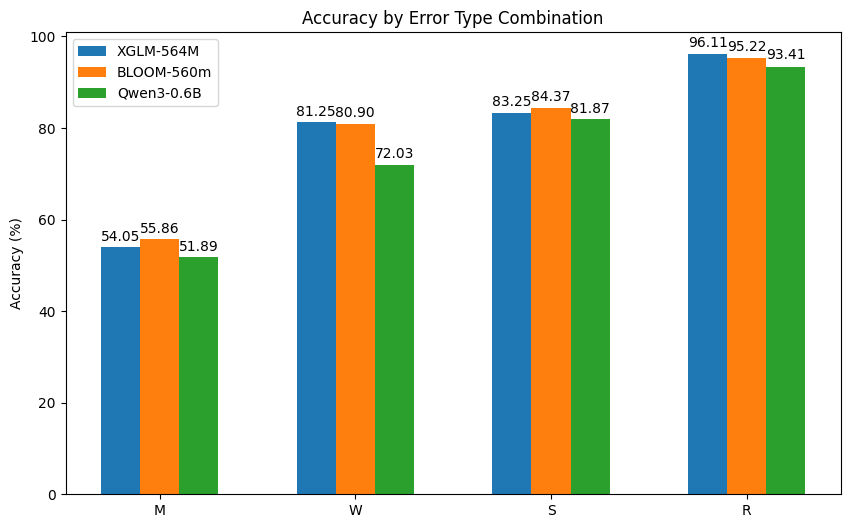

In [ ]:
# Accuracy by error type
error_types = list(model_data[models[0]]["Error Type Accuracy"].keys())
x = np.arange(len(error_types))

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2

# Define the full labels
full_error_type_labels = {
    "R": "Redundant words",
    "M": ",issing words",
    "S": "Word selection errors",
    "W": "Word ordering errors"

for i, model in enumerate(models):
    type_accuracies = [model_data[model]["Error Type Accuracy"][error_type] for error_type in error_types]
    rects = ax.bar(x + i * bar_width, type_accuracies, bar_width, label=model)

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height, '%.2f' % height, ha='center', va='bottom')


    ax.set_ylabel("Accuracy (%)")
    ax.set_title("Accuracy by Error Type Combination")
    ax.set_xticks(x + bar_width * (len(models) - 1) / 2)
    ax.set_xticklabels([full_error_type_labels[et] for et in error_types])
    ax.legend()

plt.show()

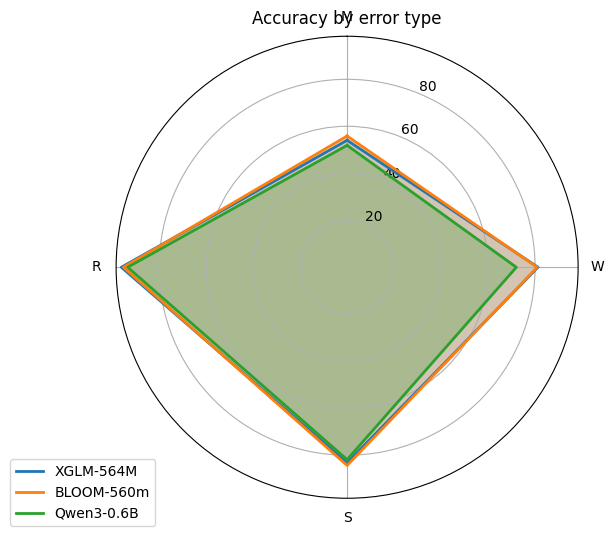

In [ ]:
error_types = list(model_data[list(model_data.keys())[0]]["Error Type Accuracy"].keys())
models = list(model_data.keys())

num_vars = len(error_types)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for model in models:
    values = [model_data[model]["Error Type Accuracy"][error_type] for error_type in error_types]
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=model)
    ax.fill(angles, values, alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), error_types)
ax.set_title("Accuracy by error type", va='bottom')

ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

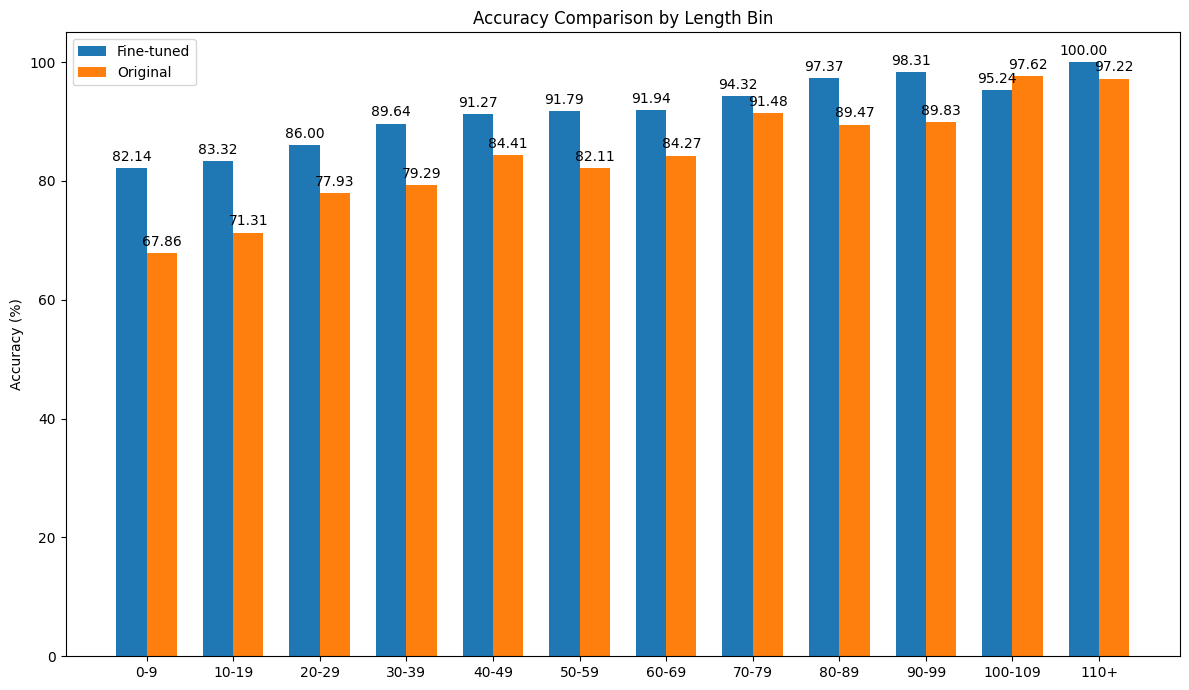

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the fine-tuned model
fine_tuned_accuracy = {
    '0-9': 82.14,
    '10-19': 83.32,
    '20-29': 86.00,
    '30-39': 89.64,
    '40-49': 91.27,
    '50-59': 91.79,
    '60-69': 91.94,
    '70-79': 94.32,
    '80-89': 97.37,
    '90-99': 98.31,
    '100-109': 95.24,
    '110+': 100.00
}

# Data for the original model
original_accuracy = {
    '0-9': 67.86,
    '10-19': 71.31,
    '20-29': 77.93,
    '30-39': 79.29,
    '40-49': 84.41,
    '50-59': 82.11,
    '60-69': 84.27,
    '70-79': 91.48,
    '80-89': 89.47,
    '90-99': 89.83,
    '100-109': 97.62,
    '110+': 97.22
}

length_bins = list(fine_tuned_accuracy.keys())
fine_tuned_values = list(fine_tuned_accuracy.values())
original_values = list(original_accuracy.values())

x = np.arange(len(length_bins))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))

rects1 = ax.bar(x - width/2, fine_tuned_values, width, label='Fine-tuned')
rects2 = ax.bar(x + width/2, original_values, width, label='Original')

ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy Comparison by Length Bin')
ax.set_xticks(x)
ax.set_xticklabels(length_bins)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.2f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

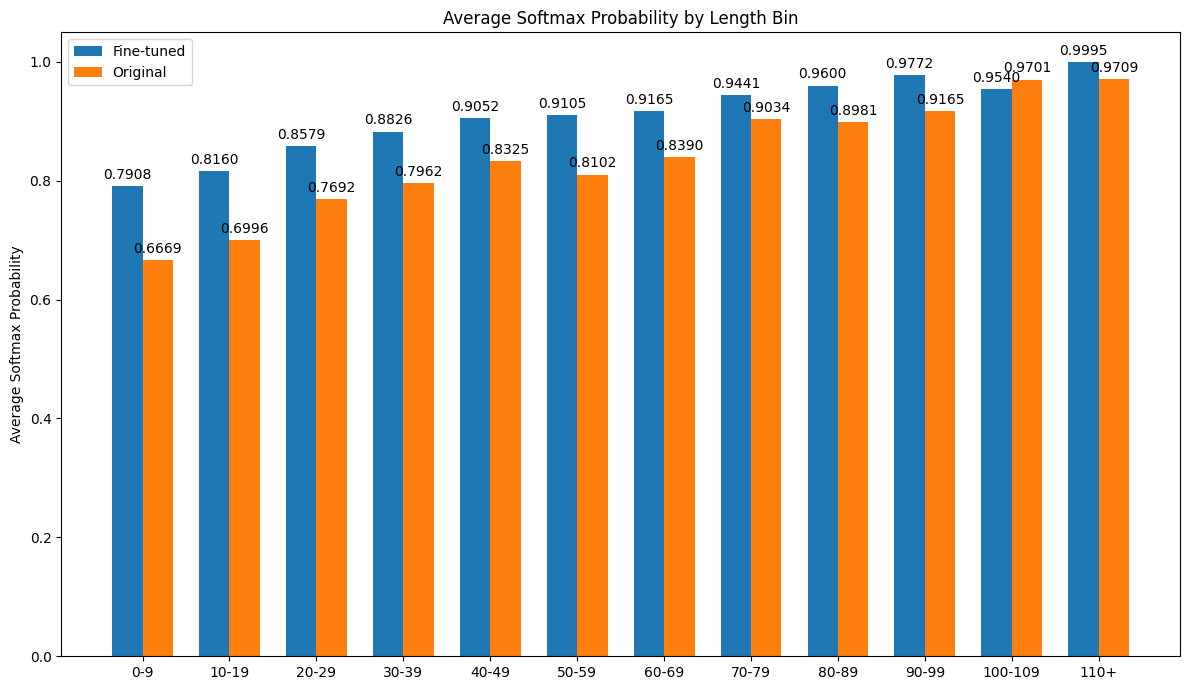

In [ ]:
# Data for the original model's softmax probability
original_softmax_probability = {
    '0-9': 0.6669,
    '10-19': 0.6996,
    '20-29': 0.7692,
    '30-39': 0.7962,
    '40-49': 0.8325,
    '50-59': 0.8102,
    '60-69': 0.8390,
    '70-79': 0.9034,
    '80-89': 0.8981,
    '90-99': 0.9165,
    '100-109': 0.9701,
    '110+': 0.9709
}

# Data for the fine-tuned model's softmax probability
fine_tuned_softmax_probability = {
    '0-9': 0.7908,
    '10-19': 0.8160,
    '20-29': 0.8579,
    '30-39': 0.8826,
    '40-49': 0.9052,
    '50-59': 0.9105,
    '60-69': 0.9165,
    '70-79': 0.9441,
    '80-89': 0.9600,
    '90-99': 0.9772,
    '100-109': 0.9540,
    '110+': 0.9995
}


length_bins = list(original_softmax_probability.keys())
original_softmax_values = list(original_softmax_probability.values())
fine_tuned_softmax_values = list(fine_tuned_softmax_probability.values())


x = np.arange(len(length_bins))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))

rects1 = ax.bar(x - width/2, fine_tuned_softmax_values, width, label='Fine-tuned')
rects2 = ax.bar(x + width/2, original_softmax_values, width, label='Original')

ax.set_ylabel("Average Softmax Probability")
ax.set_title("Average Softmax Probability by Length Bin")
ax.set_xticks(x)
ax.set_xticklabels(length_bins)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.4f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()